<a href="https://colab.research.google.com/github/DeryFerd/Machine-Learning-Project/blob/main/Codes/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [33]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [34]:
df = pd.read_csv('https://bit.ly/3rabR4N')
print('Total Row : ', len(df))
df.head(5)

Total Row :  200


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Business and Data Understanding

Business Understanding:

1. What is the age distribution of this dataset?
2. Are there any customers with young aged but high spending and old aged but low spending?
3. How many people are in the highest cluster? (young aged and high spending)
4. How many clusters are suitable for this dataset? And what are the considerations in choosing the number of clusters?

Data Understanding:

1. CustomerID
2. Genre
3. Age
4. Annual Income (k$): income every year
5. Spending Score (1-100): Something you assign to the customer based on your defined parameters like customer behavior and purchasing data

# Data Preparation

## Missing Values Handling

In [35]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values in this dataset.

## Categorical Data Encoding

In [36]:
df['Genre'] = df['Genre'].astype('category').cat.codes
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Since the Genre (Gender) column contains categorical data such as Male and Female, we will convert the categorical data into numerical data through Label Encoding.

## Anomalies and Outliers Handling

<Axes: >

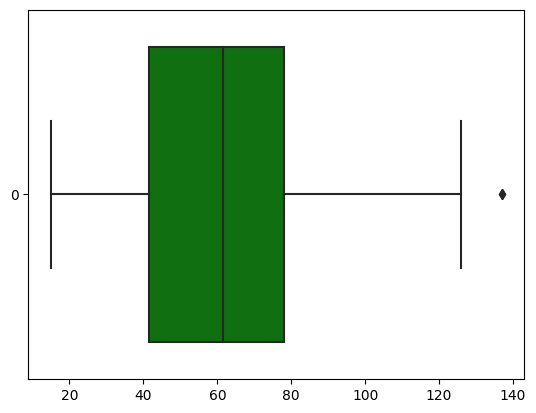

In [37]:
sns.boxplot(df['Annual Income (k$)'], color='green',orient='h')

<Axes: >

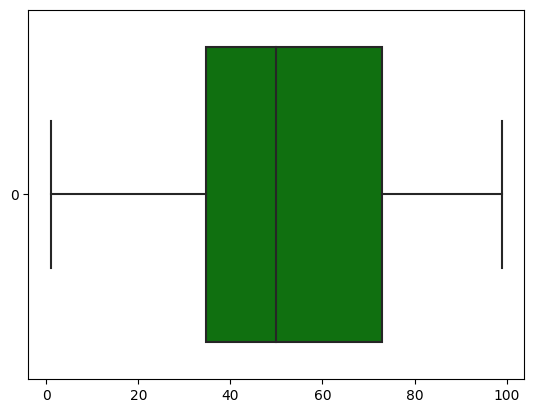

In [38]:
sns.boxplot(df['Spending Score (1-100)'], color='green',orient='h')

<Axes: >

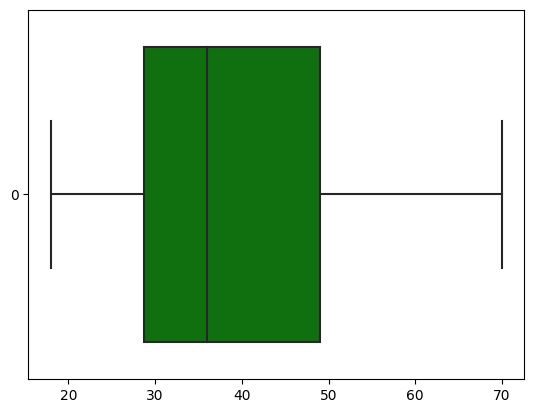

In [39]:
sns.boxplot(df['Age'], color='green',orient='h')

Based on the columns 'age', 'annual income', and 'spending score', there are no significant outliers detected. Therefore, there is no need to perform outlier handling.

# Exploratory Data Analysis

## Genre

In [40]:
gender_counts = df['Genre'].value_counts()
gender_mapping = {0: 'Female', 1: 'Male'}

gender_table = pd.DataFrame({'Gender': gender_mapping, 'Count': gender_counts})
gender_table = gender_table.sort_values('Gender')

print(gender_table)

   Gender  Count
0  Female    112
1    Male     88


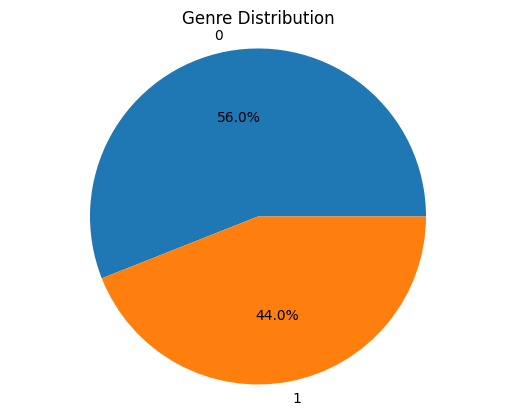

In [41]:
genre_counts = df['Genre'].value_counts()

plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.axis('equal')

plt.show()

we can see that there are more females than males in this Mall Clustering dataset.

## Age vs Spending Score

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

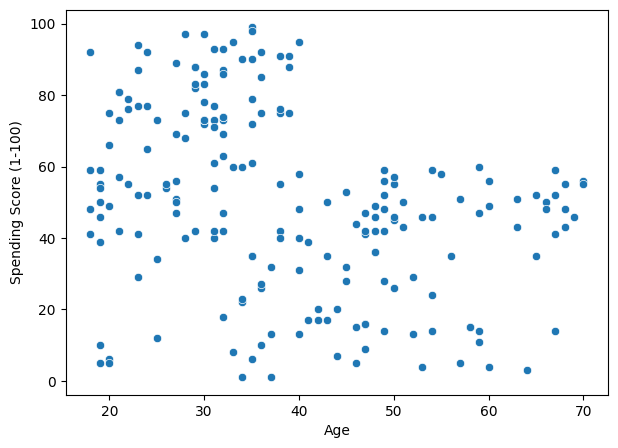

In [42]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')

This is the scatterplot between Age and Spending Score.
We want to cluster customers based on their age and spending score. We assume that there are 5-6 clusters.

# Modelling

In [43]:
feats = ['Age', 'Spending Score (1-100)']
X = df[feats].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


By performing standardization, the data in the 'Age' and 'Spending Score (1-100)' columns will have a similar scale, which facilitates the clustering process and prevents attributes with larger scales from dominating the calculations.

In [44]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 20):

  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)
  print(i, '-iteration ', 'with : ', kmeans.inertia_)

2 -iteration  with :  189.38749033992428
3 -iteration  with :  124.32628617921532
4 -iteration  with :  89.76521676586151
5 -iteration  with :  71.09364141459412
6 -iteration  with :  53.128438356294026
7 -iteration  with :  45.903798612012075
8 -iteration  with :  39.39545917716782
9 -iteration  with :  33.86021150658476
10 -iteration  with :  28.80084946927365
11 -iteration  with :  25.437614214617817
12 -iteration  with :  23.46247463467258
13 -iteration  with :  21.817419476418387
14 -iteration  with :  19.358334384220136
15 -iteration  with :  18.44162543028161
16 -iteration  with :  16.317111218040175
17 -iteration  with :  15.820181816914657
18 -iteration  with :  14.68989843992227
19 -iteration  with :  13.895156901052099


Performing clustering using the K-Means algorithm and finding the optimal number of clusters using the Elbow method. We Use a "for" loop to iterate from 2 to 19 (20 clusters). This range is chosen to search for the optimal number of clusters in the data.

<Axes: >

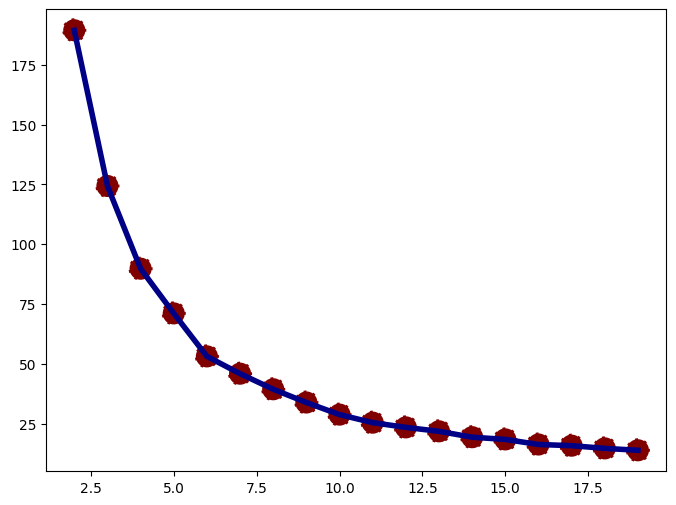

In [45]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=range(2, 20), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='#800000',  linestyle='--')

We visualize the results of the Elbow method for determining the optimal number of clusters using a line plot and scatter plot. The Elbow point, which indicates the optimal number of clusters, can be identified by examining the plot. We got 5 as our Elbow point, so we assume that we will use 5 clusters. However, this is not yet complete, we need to use evaluation metrics such as silhouette score to strengthen our clustering model.

In [46]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [47]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

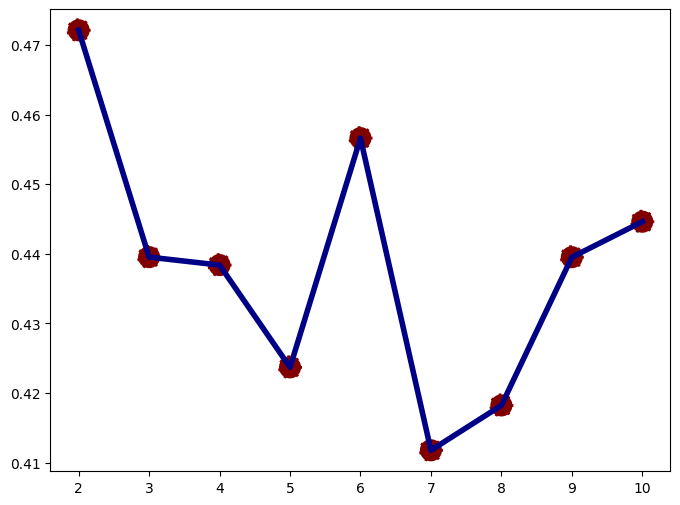

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

We can sometimes obtain unexpected results from the silhouette score, where the visualization suggests that the best number of clusters (based on the highest silhouette score) are 2 and 6. We try to use 5 clusters in this case.

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

Import library KMeans and implement the K-Means algorithm.

In [50]:
df['cluster_5'] = kmeans.labels_

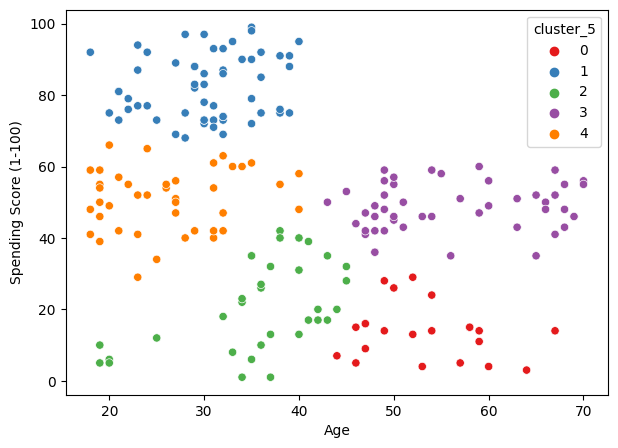

In [51]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='cluster_5', palette='Set1')
plt.show()

We got our clustering like this. The visualization we have generated seems quite good, but it would be beneficial to try different numbers of clusters.

In [54]:
display(df.groupby('cluster_5').agg(['mean']))

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
,mean,mean,mean,mean,mean
cluster_5,,,,,
0,99.909091,0.500000,53.272727,59.545455,13.681818
1,115.157895,0.421053,30.175439,66.070175,82.350877
2,121.727273,0.454545,35.636364,69.969697,20.787879
3,84.255319,0.446809,55.978723,54.425532,48.510638
4,81.975610,0.414634,26.121951,52.902439,50.707317


In [52]:
display(df.groupby('cluster_5').agg(['count']))

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
,count,count,count,count,count
cluster_5,,,,,
0,22,22,22,22,22
1,57,57,57,57,57
2,33,33,33,33,33
3,47,47,47,47,47
4,41,41,41,41,41


We classify age as follows:

1. 10-39: young
2. 40-60: middle-aged
3. 61-100: old

source that we used to classify the age: https://www.britannica.com/science/middle-age

From this cluster we got that:

1. 22 old people with low spending score.
2. 57 young people with high spending score.
3. 33 young and middle-aged people with low spending score.
4. 47 middle-aged and old people with average spending score.
5. 41 young people with average spending score.